In [2]:
% load_ext autoreload
% autoreload 2
from algorithms.GMM import GMM
import datetime

start_time = datetime.datetime(2018, 2, 7)
end_time = datetime.datetime(2018, 2, 8)

gmm = GMM(start_time, end_time, 'cvw', loadPickle=True)
#gmm.pickle()
print(gmm.data_dict.keys())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['gate', 'time', 'vel', 'trad_gsflg', 'beam', 'wid', 'elv', 'nbeam', 'nrang'])


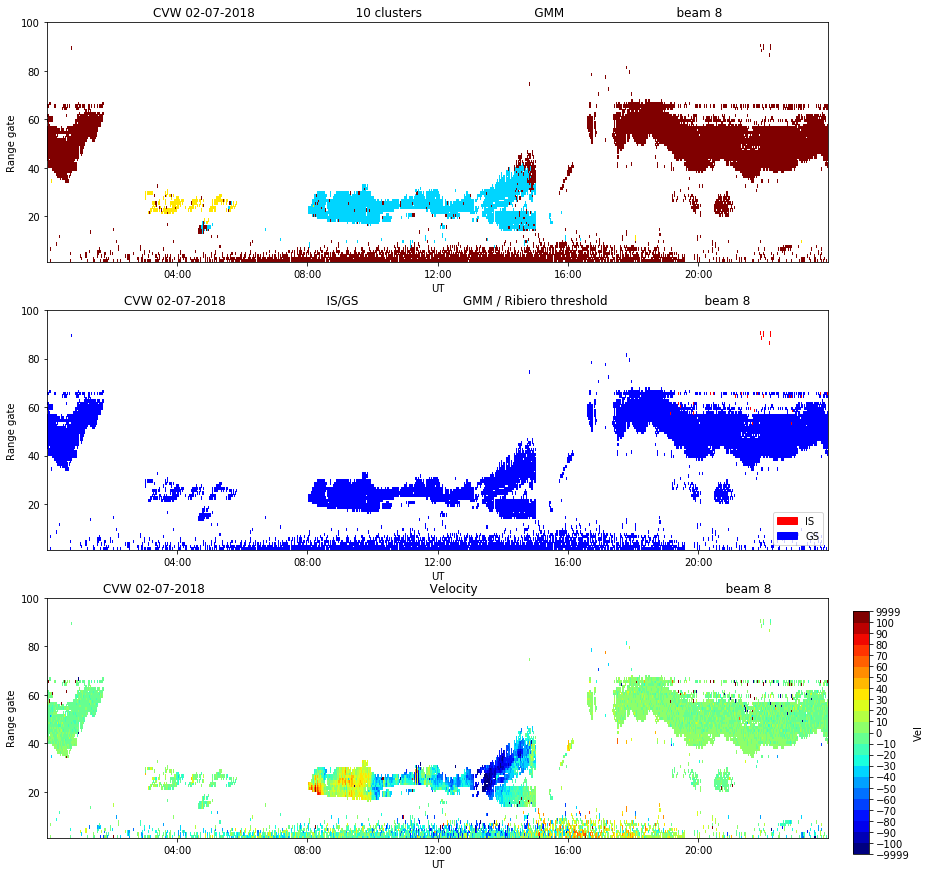

In [3]:
%matplotlib inline
gmm.plot_rti(8, 'Ribiero')

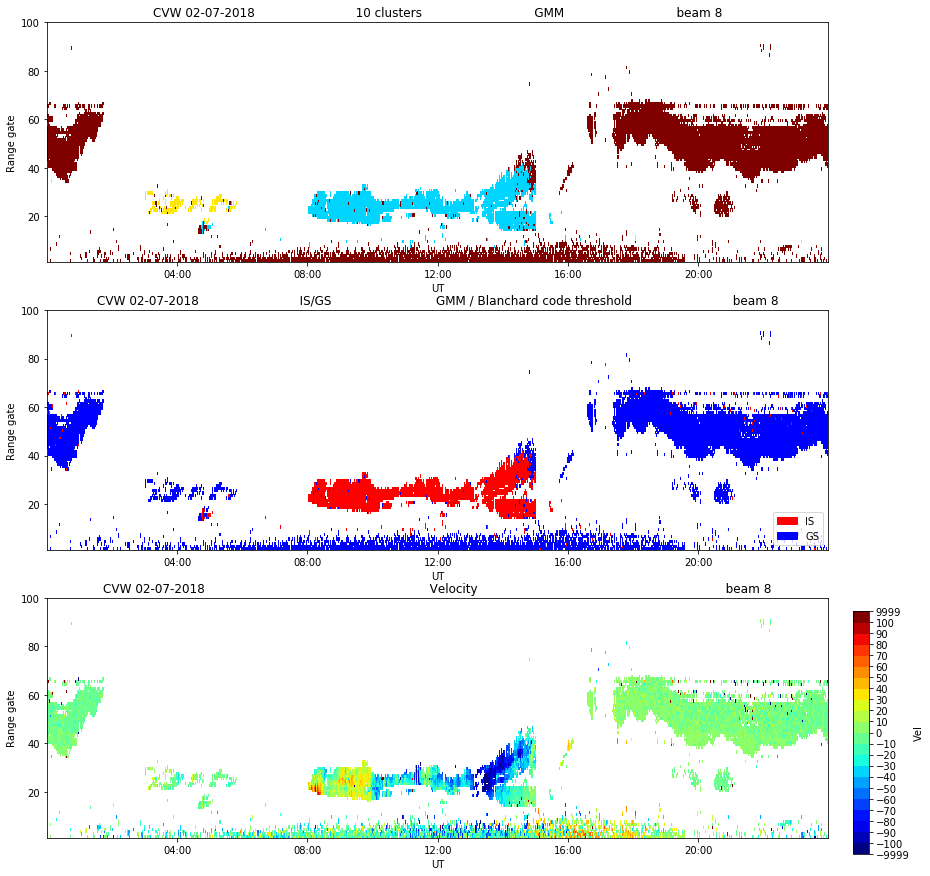

In [5]:
gmm.plot_rti(8, 'Blanchard code')